In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [23]:
# read data (5000 energy levels, varying temperature)
data_1 = np.loadtxt('results.dat')
x_1 = data_1[:, 0]
y_1 = data_1[:, 1]

data_2 = np.loadtxt('msd.dat')
x_2 = data_2[:, 0]
y_2 = data_2[:, 1]

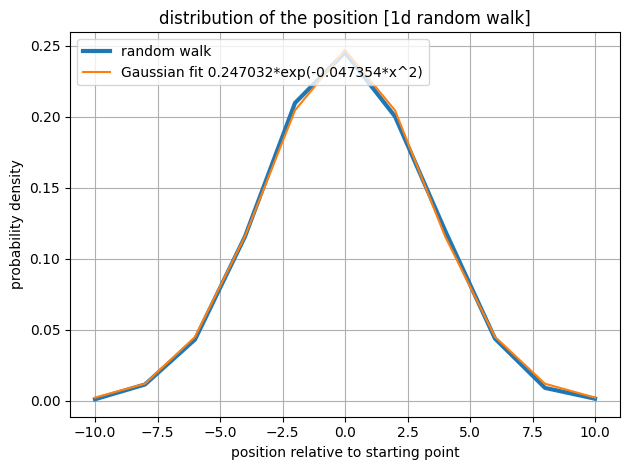

In [24]:
# Define the Gaussian function
def gaussian(x, a, b):
    return a * np.exp(b * (x ** 2))

# Initialize parameters with values from Gnuplot script
a = 0.0793365
b = 0.00493586

# Fit the Gaussian function to the data
params, covariance = curve_fit(gaussian, x_1, y_1, p0=[a, b])

# Extract the fitted parameters
a_fit, b_fit = params

# Plot the data and the Gaussian fit
plt.plot(x_1, y_1, label='random walk', linewidth=3)
plt.plot(x_1, gaussian(x_1, a_fit, b_fit), label='Gaussian fit {:.6f}*exp({:.6f}*x^2)'.format(a_fit, b_fit))
plt.xlabel('position relative to starting point')
plt.ylabel('probability density')
plt.title('distribution of the position [1d random walk]')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('random_walk.png')
plt.show()
plt.close()

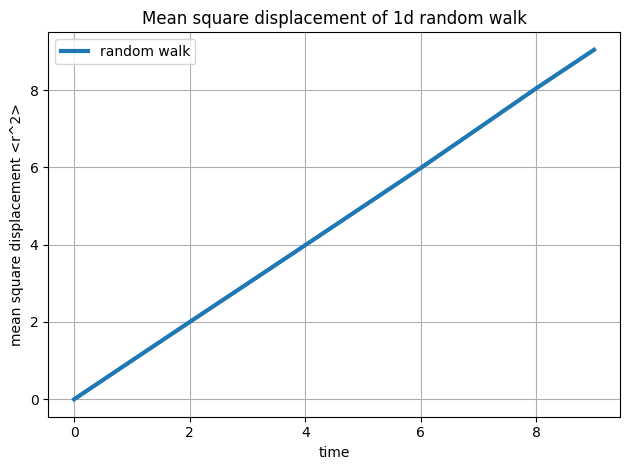

In [25]:
plt.figure()
plt.plot(x_2, y_2, label='random walk', linewidth=3)
plt.xlabel('time')
plt.ylabel('mean square displacement <r^2>')
plt.title('Mean square displacement of 1d random walk')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('msd.png')
plt.show()
plt.close()